In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import ensemble

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Imputer
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

In [4]:
listings=pd.read_csv('airbnb_revenue.csv',encoding='unicode-escape',error_bad_lines=True,engine='python')

In [3]:
corr = listings.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,X,...1,host_response_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,bookings_year,occupancy_year,revenue
Unnamed: 0,1,1,-0.288526,0.0382692,0.00631568,0.00631568,0.0584254,0.0118911,0.0658423,0.0493821,-0.0142457,-0.00851954,-0.000169737,-0.0606039,-0.0197848,-0.127132,0.0109393,0.000776546,0.00113128,0.00233967,-0.0418026,-0.00332512,0.0515146,0.0408813,0.0646726,0.0244517,0.0371225,0.0238123,0.0561013,-0.0732753,0.0822435,0.0822435,0.0822435,0.0371305
X,1,1,-0.288526,0.0382692,0.00631568,0.00631568,0.0584254,0.0118911,0.0658423,0.0493821,-0.0142457,-0.00851954,-0.000169737,-0.0606039,-0.0197848,-0.127132,0.0109393,0.000776546,0.00113128,0.00233967,-0.0418026,-0.00332512,0.0515146,0.0408813,0.0646726,0.0244517,0.0371225,0.0238123,0.0561013,-0.0732753,0.0822435,0.0822435,0.0822435,0.0371305
...1,-0.288526,-0.288526,1,-0.0740929,-0.0468481,-0.0468481,-0.109197,-0.0574793,-0.100364,-0.089834,-0.0615913,-0.0223098,-0.0579321,-0.019159,0.00499186,-0.0288105,-0.0740987,-0.00407564,-0.0013788,-0.00315984,-0.0508911,-0.243504,-0.0715856,-0.0783271,-0.100069,-0.0811944,-0.0725753,-0.046896,-0.054589,-0.0121436,0.0184814,0.0184814,0.0184814,-0.000284096
host_response_rate,0.0382692,0.0382692,-0.0740929,1,0.0394087,0.0394087,0.0306214,-0.0158272,0.00223228,0.0215391,-0.00966995,-0.0661768,-0.0170182,-5.70421e-05,-0.0591108,-0.0225282,0.0501525,0.0159328,-0.0582316,0.000359648,-0.0419777,0.114568,0.0917463,0.0970736,0.116034,0.0882008,0.103536,0.0577262,0.0843589,0.0397858,0.154569,0.154569,0.154569,0.0422684
host_listings_count,0.00631568,0.00631568,-0.0468481,0.0394087,1,1,0.0268532,0.0191305,-0.0105877,-0.00539963,-0.0792388,0.088934,0.0275647,0.11587,-0.0155777,0.106925,0.00194588,-0.0771648,-0.000439572,-0.00091818,0.120626,-0.0991953,-0.0687064,-0.0663309,-0.00559687,-0.104191,-0.104296,-0.0113346,-0.0887158,0.618188,-0.100612,-0.100612,-0.100612,0.0147924
host_total_listings_count,0.00631568,0.00631568,-0.0468481,0.0394087,1,1,0.0268532,0.0191305,-0.0105877,-0.00539963,-0.0792388,0.088934,0.0275647,0.11587,-0.0155777,0.106925,0.00194588,-0.0771648,-0.000439572,-0.00091818,0.120626,-0.0991953,-0.0687064,-0.0663309,-0.00559687,-0.104191,-0.104296,-0.0113346,-0.0887158,0.618188,-0.100612,-0.100612,-0.100612,0.0147924
accommodates,0.0584254,0.0584254,-0.109197,0.0306214,0.0268532,0.0268532,1,0.607292,0.788906,0.813957,0.344694,0.326826,0.565908,0.542517,0.139992,0.534985,0.557239,0.0809466,-0.000680297,0.0010975,0.14299,-0.0356156,0.0139206,-0.00954767,0.031649,0.00078575,-0.0106565,0.00862753,-0.0286999,0.0565967,0.0147826,0.0147826,0.0147826,0.156789
bathrooms,0.0118911,0.0118911,-0.0574793,-0.0158272,0.0191305,0.0191305,0.607292,1,0.680694,0.597781,0.415419,0.375041,0.480192,0.47206,0.220172,0.537629,0.361936,0.0667467,-0.00098655,-0.000212913,0.122682,-0.0969877,0.0146075,-0.0135478,0.00276622,-0.00672197,-0.0253323,-0.00222049,-0.020189,0.0663602,-0.0941399,-0.0941399,-0.0941399,0.0818299
bedrooms,0.0658423,0.0658423,-0.100364,0.00223228,-0.0105877,-0.0105877,0.788906,0.680694,1,0.745648,0.422811,0.338811,0.564889,0.528515,0.179564,0.538663,0.489876,0.0894775,-0.000894341,-6.98257e-05,0.0939546,-0.0800995,0.037417,0.00771035,0.0317091,0.0259656,0.00687785,-0.00279053,-0.00202826,0.004755,-0.0759239,-0.0759239,-0.0759239,0.110657
beds,0.0493821,0.0493821,-0.089834,0.0215391,-0.00539963,-0.00539963,0.813957,0.597781,0.745648,1,0.333128,0.282248,0.515898,0.486632,0.119563,0.472771,0.483547,0.0788026,-0.000127816,0.000767197,0.133268,-0.0391869,0.00180867,-0.0209814,0.0127197,-0.00221131,-0.0160435,-0.009412

TypeError: cannot perform reduce with flexible type

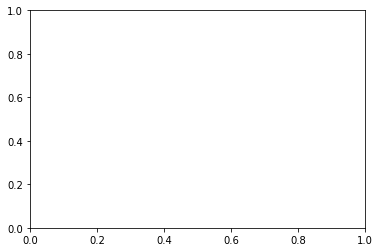

In [4]:
plt.boxplot(listings['host_is_superhost'],listings['reviews_per_month'])

In [4]:
listings['host_since']

0          12/3/2008
1          2/19/2009
2          2/19/2009
3          5/11/2009
4          7/22/2009
5          7/22/2009
6          9/16/2009
7          9/16/2009
8          9/16/2009
9          1/19/2010
10         2/26/2010
11         3/23/2010
12          5/6/2010
13         5/19/2010
14          7/6/2010
15         7/20/2010
16         5/19/2010
17         8/18/2010
18        10/26/2010
19         10/6/2010
20         7/22/2009
21        12/21/2010
22         7/22/2009
23         10/6/2010
24          3/1/2011
25          4/8/2011
26         4/14/2011
27         3/10/2011
28          7/1/2011
29         2/19/2009
             ...    
256786     7/17/2018
256787      5/1/2016
256788     7/20/2019
256789     7/20/2019
256790     3/12/2017
256791     7/21/2019
256792     11/6/2014
256793     2/20/2018
256794     7/21/2019
256795     5/21/2019
256796      4/1/2016
256797     3/30/2018
256798    10/24/2015
256799     9/20/2017
256800     7/22/2019
256801    12/19/2015
256802     8/

In [5]:
corr = listings.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,X,...1,host_response_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,bookings_year,occupancy_year,revenue
Unnamed: 0,1,1,-0.288526,0.0382692,0.00631568,0.00631568,0.0584254,0.0118911,0.0658423,0.0493821,-0.0142457,-0.00851954,-0.000169737,-0.0606039,-0.0197848,-0.127132,0.0109393,0.000776546,0.00113128,0.00233967,-0.0418026,-0.00332512,0.0515146,0.0408813,0.0646726,0.0244517,0.0371225,0.0238123,0.0561013,-0.0732753,0.0822435,0.0822435,0.0822435,0.0371305
X,1,1,-0.288526,0.0382692,0.00631568,0.00631568,0.0584254,0.0118911,0.0658423,0.0493821,-0.0142457,-0.00851954,-0.000169737,-0.0606039,-0.0197848,-0.127132,0.0109393,0.000776546,0.00113128,0.00233967,-0.0418026,-0.00332512,0.0515146,0.0408813,0.0646726,0.0244517,0.0371225,0.0238123,0.0561013,-0.0732753,0.0822435,0.0822435,0.0822435,0.0371305
...1,-0.288526,-0.288526,1,-0.0740929,-0.0468481,-0.0468481,-0.109197,-0.0574793,-0.100364,-0.089834,-0.0615913,-0.0223098,-0.0579321,-0.019159,0.00499186,-0.0288105,-0.0740987,-0.00407564,-0.0013788,-0.00315984,-0.0508911,-0.243504,-0.0715856,-0.0783271,-0.100069,-0.0811944,-0.0725753,-0.046896,-0.054589,-0.0121436,0.0184814,0.0184814,0.0184814,-0.000284096
host_response_rate,0.0382692,0.0382692,-0.0740929,1,0.0394087,0.0394087,0.0306214,-0.0158272,0.00223228,0.0215391,-0.00966995,-0.0661768,-0.0170182,-5.70421e-05,-0.0591108,-0.0225282,0.0501525,0.0159328,-0.0582316,0.000359648,-0.0419777,0.114568,0.0917463,0.0970736,0.116034,0.0882008,0.103536,0.0577262,0.0843589,0.0397858,0.154569,0.154569,0.154569,0.0422684
host_listings_count,0.00631568,0.00631568,-0.0468481,0.0394087,1,1,0.0268532,0.0191305,-0.0105877,-0.00539963,-0.0792388,0.088934,0.0275647,0.11587,-0.0155777,0.106925,0.00194588,-0.0771648,-0.000439572,-0.00091818,0.120626,-0.0991953,-0.0687064,-0.0663309,-0.00559687,-0.104191,-0.104296,-0.0113346,-0.0887158,0.618188,-0.100612,-0.100612,-0.100612,0.0147924
host_total_listings_count,0.00631568,0.00631568,-0.0468481,0.0394087,1,1,0.0268532,0.0191305,-0.0105877,-0.00539963,-0.0792388,0.088934,0.0275647,0.11587,-0.0155777,0.106925,0.00194588,-0.0771648,-0.000439572,-0.00091818,0.120626,-0.0991953,-0.0687064,-0.0663309,-0.00559687,-0.104191,-0.104296,-0.0113346,-0.0887158,0.618188,-0.100612,-0.100612,-0.100612,0.0147924
accommodates,0.0584254,0.0584254,-0.109197,0.0306214,0.0268532,0.0268532,1,0.607292,0.788906,0.813957,0.344694,0.326826,0.565908,0.542517,0.139992,0.534985,0.557239,0.0809466,-0.000680297,0.0010975,0.14299,-0.0356156,0.0139206,-0.00954767,0.031649,0.00078575,-0.0106565,0.00862753,-0.0286999,0.0565967,0.0147826,0.0147826,0.0147826,0.156789
bathrooms,0.0118911,0.0118911,-0.0574793,-0.0158272,0.0191305,0.0191305,0.607292,1,0.680694,0.597781,0.415419,0.375041,0.480192,0.47206,0.220172,0.537629,0.361936,0.0667467,-0.00098655,-0.000212913,0.122682,-0.0969877,0.0146075,-0.0135478,0.00276622,-0.00672197,-0.0253323,-0.00222049,-0.020189,0.0663602,-0.0941399,-0.0941399,-0.0941399,0.0818299
bedrooms,0.0658423,0.0658423,-0.100364,0.00223228,-0.0105877,-0.0105877,0.788906,0.680694,1,0.745648,0.422811,0.338811,0.564889,0.528515,0.179564,0.538663,0.489876,0.0894775,-0.000894341,-6.98257e-05,0.0939546,-0.0800995,0.037417,0.00771035,0.0317091,0.0259656,0.00687785,-0.00279053,-0.00202826,0.004755,-0.0759239,-0.0759239,-0.0759239,0.110657
beds,0.0493821,0.0493821,-0.089834,0.0215391,-0.00539963,-0.00539963,0.813957,0.597781,0.745648,1,0.333128,0.282248,0.515898,0.486632,0.119563,0.472771,0.483547,0.0788026,-0.000127816,0.000767197,0.133268,-0.0391869,0.00180867,-0.0209814,0.0127197,-0.00221131,-0.0160435,-0.009412

In [5]:
df=listings

G:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
G:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
G:\Anaconda\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


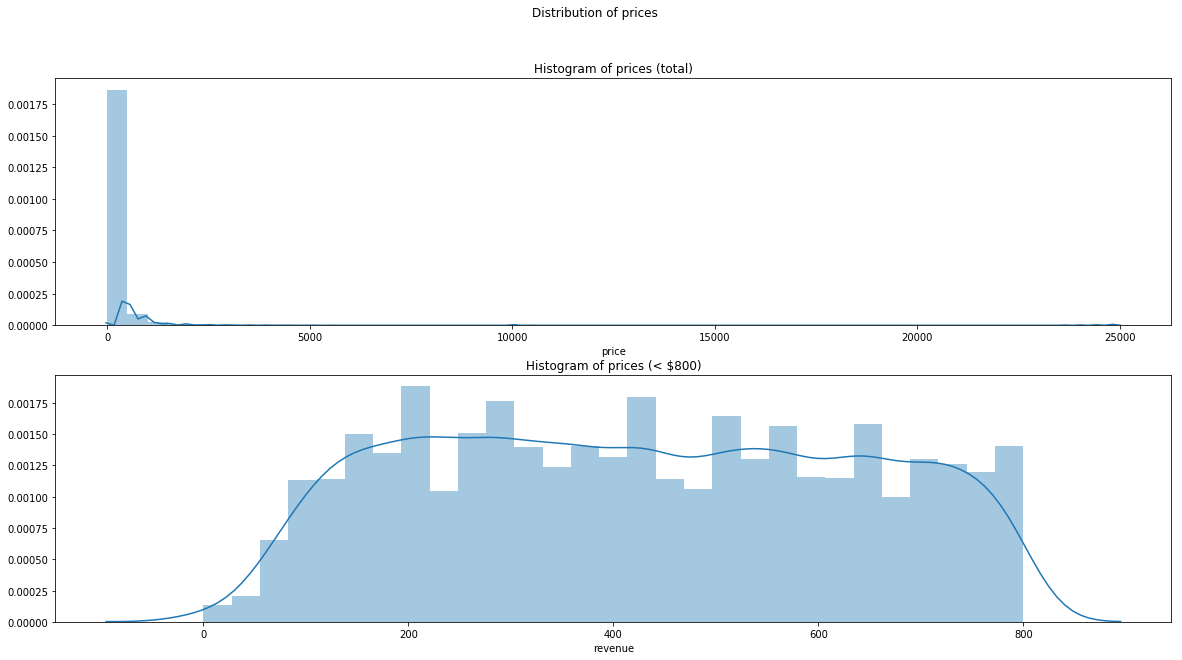

In [9]:
fig, ax= plt.subplots(2,1, figsize=(20,10))

ax[0].set_title("Histogram of prices (total)")
sns.distplot(df['price'], kde=True, ax=ax[0])
ax[1].set_title("Histogram of prices (< $800)")
sns.distplot(df[df['revenue'] < 800]['revenue'], kde=True, ax=ax[1])



fig.suptitle("Distribution of prices")
fig.show()

Text(0,0.5,'Bathrooms and Bedrooms')

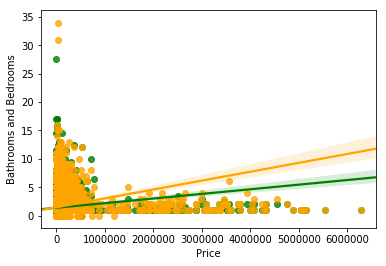

In [11]:
sns.regplot(y=df['bathrooms'],x=df['revenue'],color='green')
sns.regplot(y=df['bedrooms'],x=df['revenue'],color='orange')
plt.xlabel("Price")
plt.ylabel("Bathrooms and Bedrooms")

In [12]:
import scipy.stats as stats

G:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
G:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
G:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
G:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
G:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


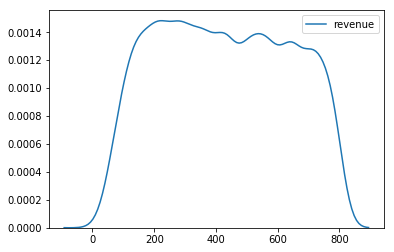

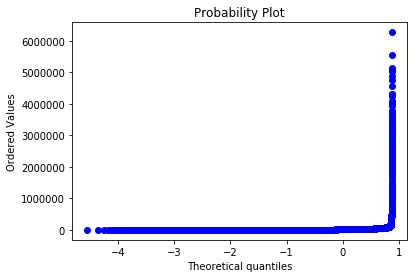

In [13]:
sns.kdeplot(df['revenue'] , clip= (0.0, 800))

fig = plt.figure()
res = stats.probplot(df['revenue'], plot=plt)
plt.show()

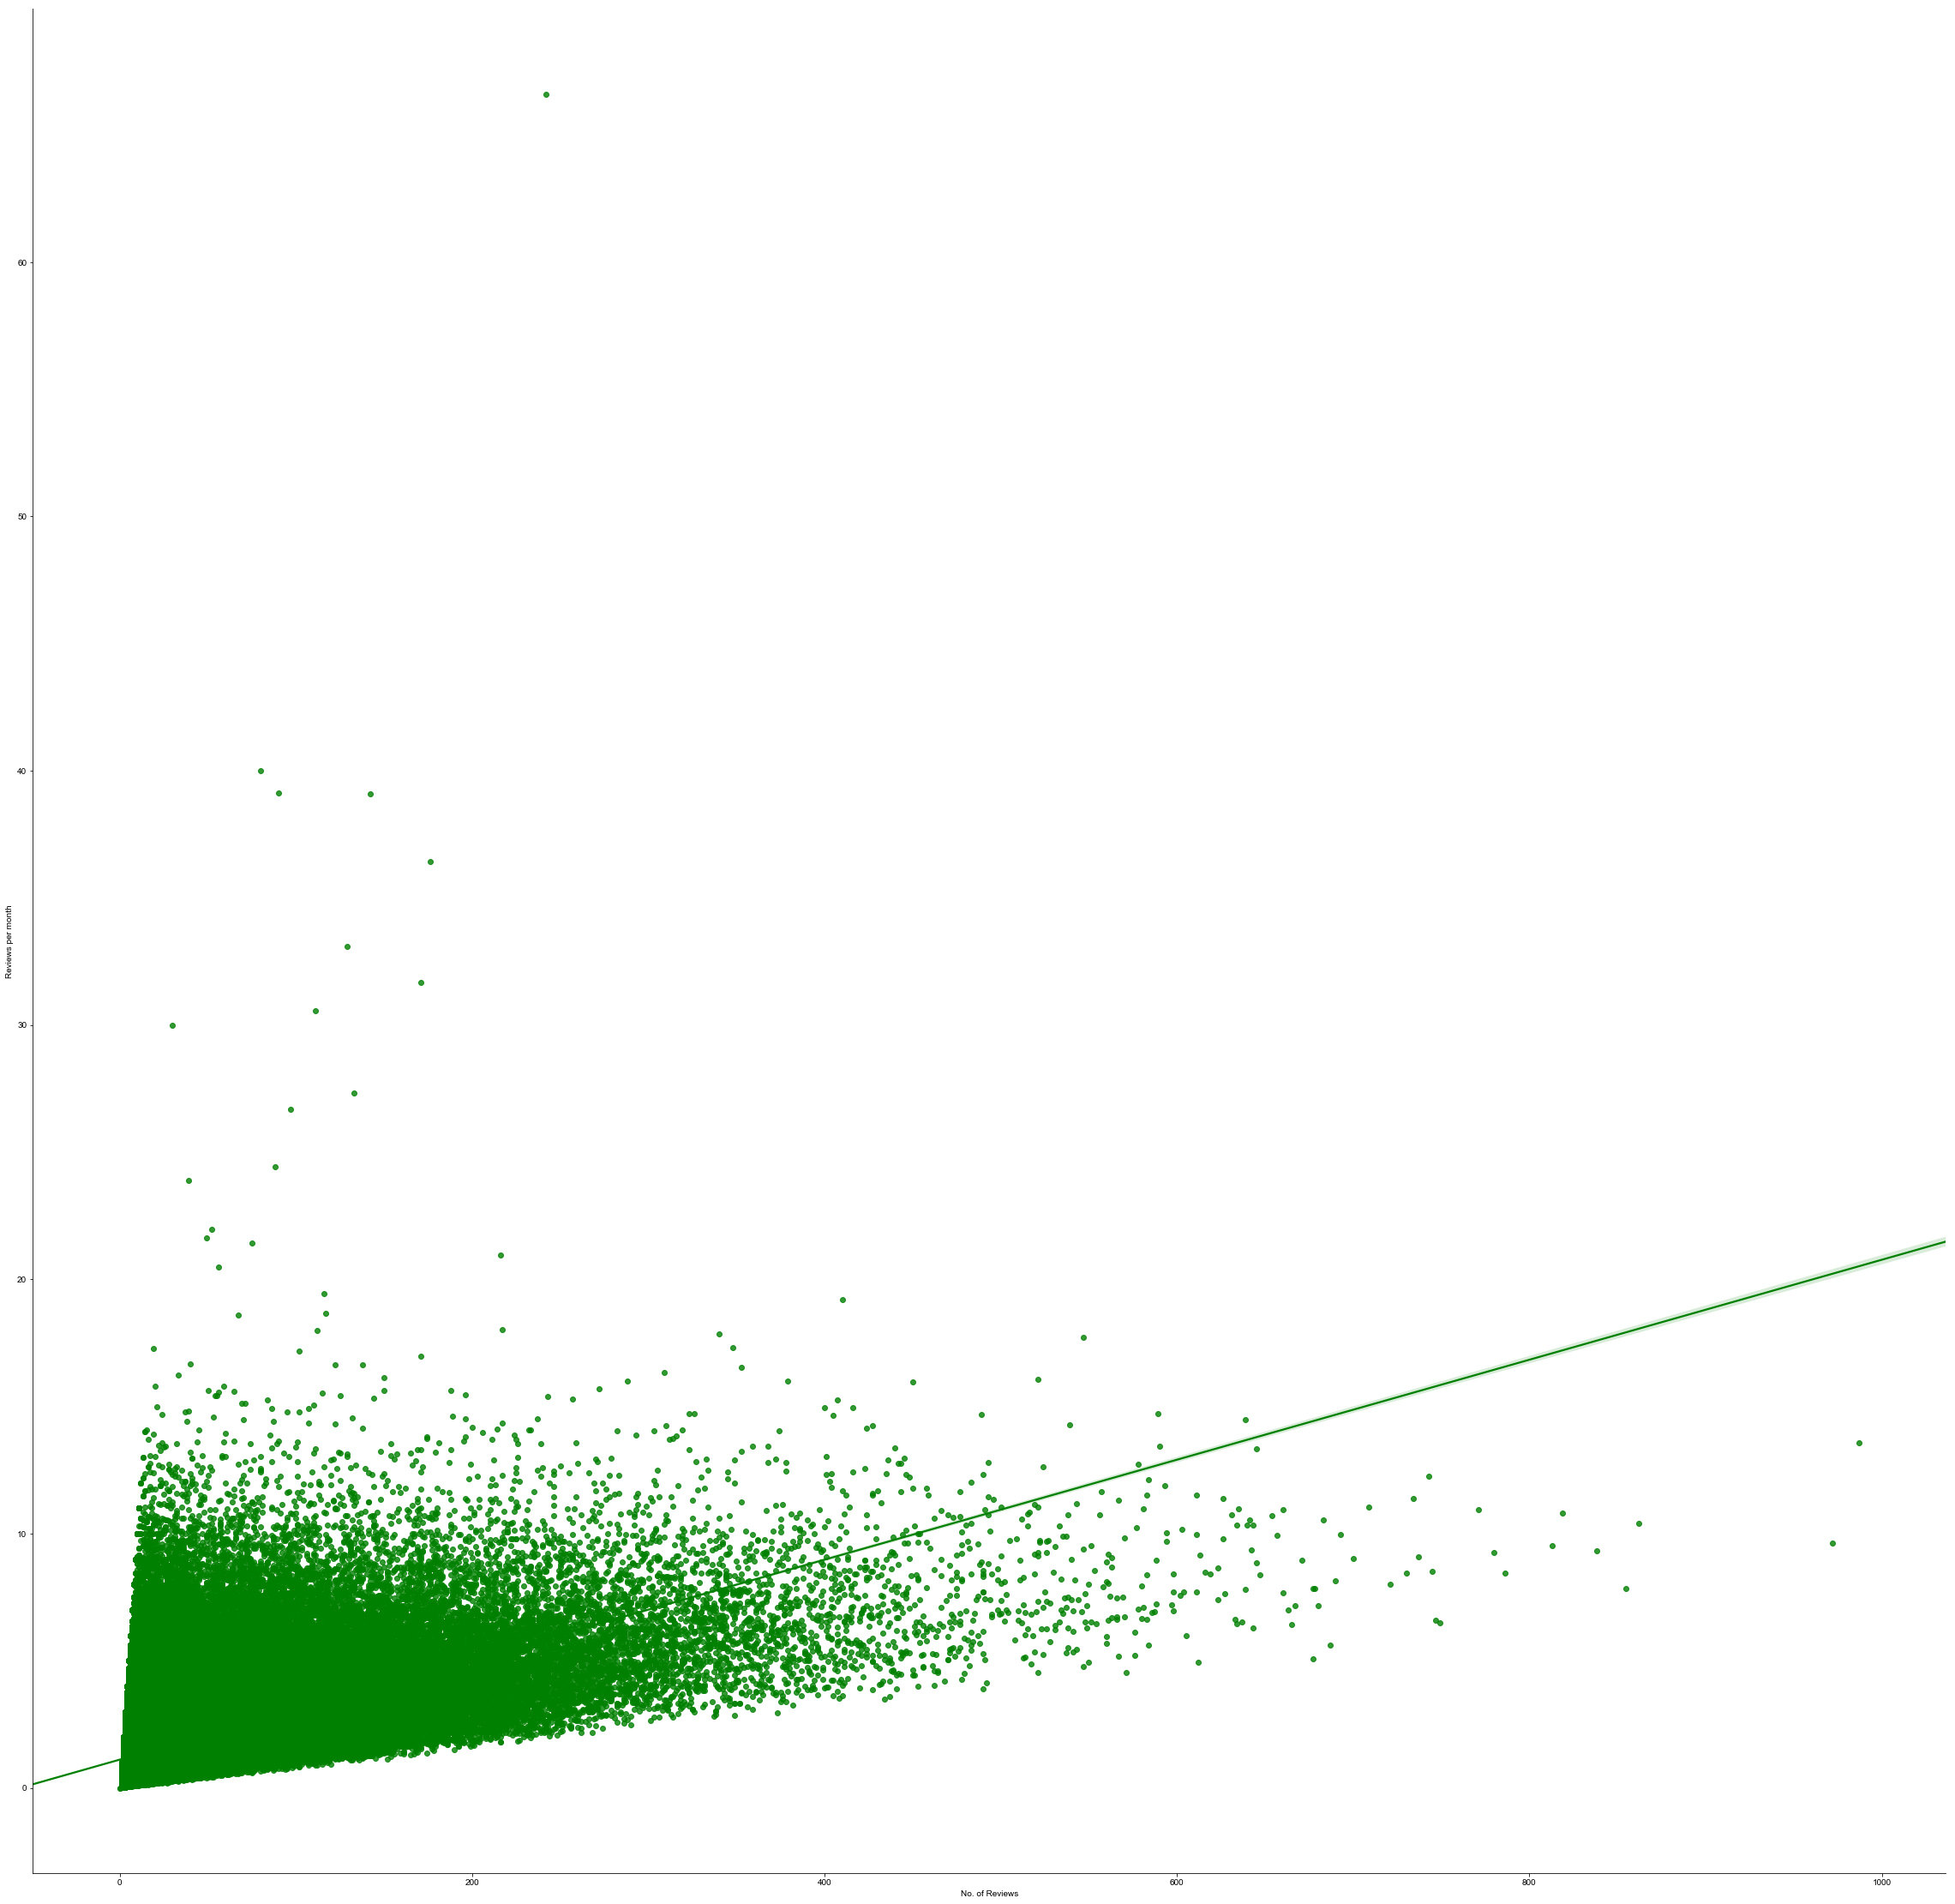

In [14]:
g=sns.regplot(y=df['reviews_per_month'],x=df['number_of_reviews'],color='green')
# sns.regplot(y=df['bedrooms'],x=df['price'],color='orange')
sns.set_style('ticks')
plt.xlabel("No. of Reviews")
plt.ylabel("Reviews per month")
g.figure.set_size_inches(40, 40)
sns.despine()

In [4]:
# num_columns=['accommodates','bathrooms','bedrooms','beds','guests_included','minimum_nights',
# 'number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
# 'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
# 'reviews_per_month']

In [15]:
listings=listings.fillna(0)

In [ ]:
# z test and or some model tests

listings_reviews=listings[listings['number_of_reviews']>0]
listings_no_reviews=listings[listings['number_of_reviews']==0]
print('number of listings with reviews ',listings_reviews.shape[0])
print('number of listings without reviews ',listings_no_reviews.shape[0])
print('reviews, mean: ',np.mean(listings_reviews['price']),'standard deviation: ',np.std(listings_reviews['price']))
print('no reviews, mean: ',np.mean(listings_no_reviews['price']),'standard deviation: ',np.std(listings_no_reviews['price']))
plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1).set_title('with reviews')
plt.hist(listings_reviews['revenue'],bins=10);
plt.subplot(1,2,2).set_title('no reviews')
plt.hist(listings_no_reviews['revenue'],bins=10);
plt.show()

# Surprisingly, the mean for sample of listings without review is bigger than the mean of sample with reviews.


In [ ]:
N=10000
n=listings_reviews.shape[0]
means=np.zeros(N)
for i in range(N):
    x=np.random.choice(listings_reviews['revenue'],n)
    means[i]=np.mean(x)
plt.hist(means,bins=40);
print("98% confidence interval for the sample mean for listings with reviews",np.percentile(means,[1,99]))

n=listings_no_reviews.shape[0]
means=np.zeros(N)
for i in range(N):
    x=np.random.choice(listings_no_reviews['revenue'],n)
    means[i]=np.mean(x)
plt.hist(means,bins=40);
print("98% confidence interval for the sample mean for listings without reviews",np.percentile(means,[1,99]))

In [ ]:
# Thus we see that ctrict cancellation policy is more likely associated with more expensive rooms. 
#This is quit surprising to see as one could expect that new listings will be advertised for lower price to attract guests. 
# One possible explanation could be that new listings can appear in newly built houses that should be more expensive.

In [68]:
df[df['host_is_superhost']=='t']==1

,Unnamed: 0,X,...1,host_since,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,bookings_year,occupancy_year,revenue
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,True,False,False,False,False
11,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,True,False,False,False,False
14,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,True,False,False,False,False
15,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,True,False,False,False,False
18,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,True,False,False,False,False
19,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
26,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,True,False,False,False,False


In [6]:
from sklearn import preprocessing
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(df['instant_bookable'])
df['instant_bookable']=le.fit_transform(df['instant_bookable'].astype(str)) 
# le.fit(df['host_is_superhost'])
df['host_is_superhost']=le.fit_transform(df['host_is_superhost'].astype(str)) 
# le.fit(df['host_has_profile_pic'])
df['host_has_profile_pic']=le.fit_transform(df['host_has_profile_pic'].astype(str)) 
# le.fit(df['host_identity_verified'])
df['host_identity_verified']=le.fit_transform(df['host_identity_verified'].astype(str)) 

In [23]:
# le.fit(df['cancellation_policy'])
df['cancellation_policy']=le.fit_transform(df['cancellation_policy'].astype(str)) 

In [24]:
# le.fit(df['require_guest_profile_picture'])
df['require_guest_profile_picture']=le.fit_transform(df['require_guest_profile_picture'].astype(str)) 
# le.fit(df['host_response_time'])
df['host_response_time']=le.fit_transform(df['host_response_time'].astype(str)) 
# le.fit(df['is_location_exact'])
df['is_location_exact']=le.fit_transform(df['is_location_exact'].astype(str)) 
# le.fit(df['property_type'])
df['property_type']=le.fit_transform(df['property_type'].astype(str)) 
# le.fit(df['room_type'])
df['room_type']=le.fit_transform(df['room_type'].astype(str)) 
# le.fit(df['bed_type'])
df['bed_type']=le.fit_transform(df['bed_type'].astype(str)) 
# le.fit(df['is_business_travel_ready'])
df['is_business_travel_ready']=le.fit_transform(df['is_business_travel_ready'].astype(str)) 
# le.fit(df['require_guest_phone_verification'])
df['require_guest_phone_verification']=le.fit_transform(df['require_guest_phone_verification'].astype(str)) 

In [48]:
listings['cancellation_policy'].describe()

count       256810
unique           3
top       moderate
freq        181192
Name: cancellation_policy, dtype: object

In [50]:
df[df['cancellation_policy']==0]


,Unnamed: 0,X,...1,host_since,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,bookings_year,occupancy_year,revenue
37,38,38,37,7/26/2011,4,100.0,2,Charlestown,1.0,1.0,...,1,0,0,0,0,1,1.10,26.40,79.20,13384.80
68,69,69,68,5/13/2012,1,NaN,2,Jamaica Plain,1.0,1.0,...,1,0,0,0,0,1,0.72,17.28,51.84,10730.88
95,96,96,95,10/11/2012,1,NaN,0,Jamaica Plain,1.0,1.0,...,0,0,0,0,0,1,0.04,0.96,2.88,158.40
111,112,112,111,1/17/2013,2,100.0,2,North End,1.0,1.0,...,0,0,0,0,1,1,4.70,112.80,338.40,42300.00
118,119,119,118,7/29/2011,4,93.0,0,Charlestown,12.0,12.0,...,0,0,0,0,1,7,NaN,NaN,NaN,NaN
122,123,123,122,3/28/2013,4,100.0,2,Jamaica Plain,1.0,1.0,...,0,0,0,0,0,1,0.27,6.48,19.44,2080.08
126,127,127,126,12/1/2012,3,90.0,0,Beacon Hill,2.0,2.0,...,0,0,0,0,0,2,0.11,2.64,7.92,990.00
131,132,132,131,4/14/2013,1,NaN,0,South End,1.0,1.0,...,0,0,0,0,0,1,NaN,NaN,NaN,NaN
140,141,141,140,12/7/2011,1,NaN,0,Jamaica Plain,5.0,5.0,...,1,0,0,0,0,5,4.63,111.12,333.36,20001.60
151,152,152,151,5/19/2013,2,86.0,0,South End,1.0,1.0,...,0,0,0,0,0,1,0.45,10.80,32.40,4860.00


In [ ]:
sns.barplot(df['cancellation_policy'],df['host_is_superhost']==0)

In [37]:
aa=pd.DataFrame()
aa['normal_host']=df['host_is_superhost']==0

In [ ]:
sns.swarmplot(df['cancellation_policy'],aa['normal_host'])

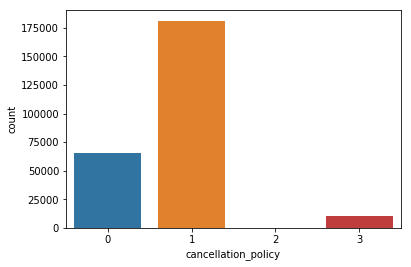

In [53]:
sns.countplot(df['cancellation_policy'])

In [93]:
df=df.fillna(0)

In [94]:
df

,Unnamed: 0,X,...1,host_since,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,bookings_year,occupancy_year,revenue
0,1,1,0,12/3/2008,2,80.0,2,East Boston,4.0,4.0,...,0,0,3,0,0,1,0.31,7.44,22.32,2790.00
1,2,2,1,2/19/2009,4,100.0,1,Roxbury,6.0,6.0,...,1,0,2,0,0,6,0.76,18.24,54.72,7934.40
2,3,3,2,2/19/2009,4,100.0,1,Roxbury,6.0,6.0,...,1,0,2,0,0,6,0.84,20.16,60.48,10221.12
3,4,4,3,5/11/2009,4,100.0,2,Roslindale,1.0,1.0,...,0,0,2,1,0,1,0.66,15.84,47.52,3088.80
4,5,5,4,7/22/2009,2,93.0,1,Beacon Hill,12.0,12.0,...,0,0,2,0,0,10,0.38,9.12,27.36,2708.64
5,6,6,5,7/22/2009,2,93.0,1,Beacon Hill,12.0,12.0,...,0,0,2,0,0,10,0.24,5.76,17.28,2592.00
6,7,7,6,9/16/2009,3,96.0,1,Back Bay,16.0,16.0,...,0,0,2,0,0,10,0.19,4.56,13.68,2448.72
7,8,8,7,9/16/2009,3,96.0,1,Back Bay,16.0,16.0,...,0,0,2,0,0,10,1.80,43.20,129.60,23198.40
8,9,9,8,9/16/2009,3,96.0,1,Back Bay,16.0,16.0,...,0,0,2,0,0,10,0.05,1.20,3.60,450.00
9,10,10,9,1/19/2010,4,98.0,1,Dorchester,24.0,24.0,...,1,0,2,0,0,23,0.45,10.80,32.40,4082.40


In [109]:
#linear regression
x=df.drop(['Unnamed: 0', 'X', '...1','host_since','host_neighbourhood','city','state','zipcode', 'market','revenue'],axis=1)
y=df['revenue']

In [110]:
x.columns

Index(['host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'is_business_travel_ready',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month', 'bookings_year', 'occupancy_year'],
   

In [ ]:
df = df[df.bedrooms == 1]

# remove the $ from the price and convert to float
df['price'] = df['price'].replace('[\$,)]','',  \
        regex=True).replace('[(]','-', regex=True).astype(float)


In [13]:
# get feature encoding for categorical variables
rt_dummies = pd.get_dummies(df.room_type)
xcl_dummies = pd.get_dummies(df.cancellation_policy)

# convert boolean column to a single boolean value indicating whether this listing has instant booking available
ib_dummies = pd.get_dummies(df.instant_bookable, prefix="instant")
ib_dummies = ib_dummies.drop('instant_f', axis=1)

# replace the old columns with our new one-hot encoded ones
alldata = pd.concat((df.drop(['room_type', 'cancellation_policy', 'instant_bookable'], axis=1), rt_dummies.astype(int), \
    xcl_dummies.astype(int), ib_dummies.astype(int)), \
    axis=1)
allcols = alldata.columns

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


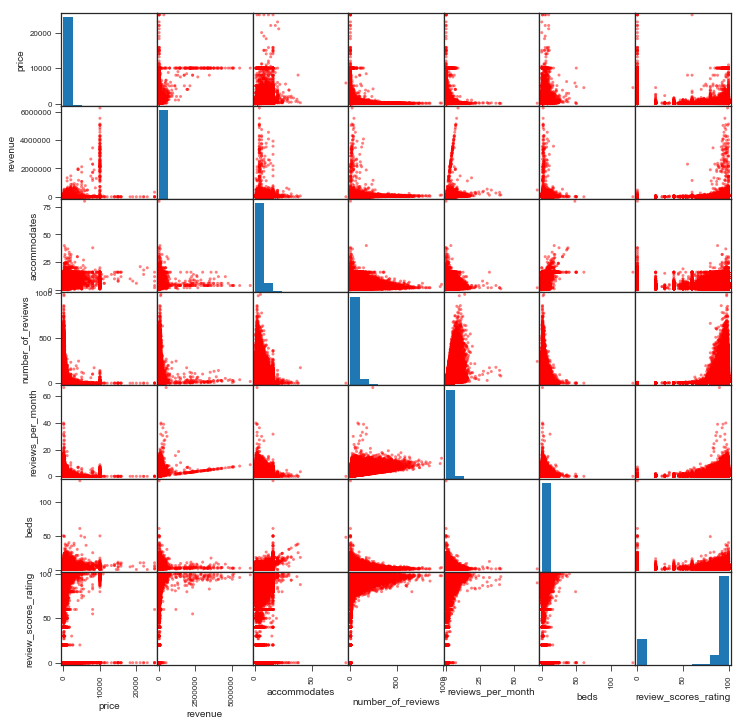

In [349]:
scattercols = ['price','revenue','accommodates', 'number_of_reviews', 'reviews_per_month', 'beds', 'review_scores_rating']
axs = pd.scatter_matrix(listings[scattercols],
                        figsize=(12, 12), c='red')

In [124]:
rs = 1
ests = [linear_model.LinearRegression(), linear_model.Ridge(),
        linear_model.Lasso()]
ests_labels = np.array(['Linear', 'Ridge', 'Lasso'])
errvals = np.array([])

X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y, test_size=0.2, random_state=20)

In [125]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205452 entries, 182001 to 245091
Data columns (total 43 columns):
host_response_time                  205452 non-null int64
host_response_rate                  205452 non-null float64
host_is_superhost                   205452 non-null int64
host_listings_count                 205452 non-null float64
host_total_listings_count           205452 non-null float64
host_has_profile_pic                205452 non-null int64
host_identity_verified              205452 non-null int64
is_location_exact                   205452 non-null int64
property_type                       205452 non-null int64
room_type                           205452 non-null int64
accommodates                        205452 non-null int64
bathrooms                           205452 non-null float64
bedrooms                            205452 non-null float64
beds                                205452 non-null float64
bed_type                            205452 non-null int64
sq

In [129]:
from sklearn.model_selection import GridSearchCV

In [131]:
n_est = 300

tuned_parameters = {
    "n_estimators": [ n_est ],
    "max_depth" : [ 4 ],
    "learning_rate": [ 0.01 ],
    "min_samples_split" : [ 2 ],
    "loss" : [ 'ls', 'lad' ]
}

gbr = ensemble.GradientBoostingRegressor()
clf = GridSearchCV(gbr, cv=3, param_grid=tuned_parameters,
        scoring='median_absolute_error')
preds = clf.fit(X_train, y_train)
best = clf.best_estimator_

G:\Anaconda\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method median_absolute_error was renamed to neg_median_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
G:\Anaconda\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method median_absolute_error was renamed to neg_median_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


KeyboardInterrupt: 

In [ ]:
feature_importance = clf.best_estimator_.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
pvals = feature_importance[sorted_idx]
pcols = X_train.columns[sorted_idx]
plt.figure(figsize=(8,12))
plt.barh(pos, pvals, align='center')
plt.yticks(pos, pcols)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

In [132]:
features_train, features_test, logprices_train, logprices_test= train_test_split(x,y,random_state=42)

In [133]:
lm=lm.fit(features_train,logprices_train)

In [139]:
a=lm.predict(features_test)

In [141]:
list(a)

[11282.827541420556,
 250.17967041037627,
 -850.5369182799186,
 38613.575207473186,
 11990.956482023314,
 8731.937259464983,
 6739.5242795006125,
 -538.8745861308271,
 20482.292725228494,
 38320.33310055811,
 13315.024192626406,
 -316.402806620943,
 2592.4563721879967,
 77738.65487916759,
 6148.894374390853,
 -18626.23680905276,
 23224.69310066871,
 2454.6467270515495,
 98541.91731816794,
 65615.71465044588,
 -10215.88506222612,
 -4733.964812720304,
 5026.905167697645,
 52345.104722725344,
 5759.186934067955,
 -42348.88264467454,
 7995.734513379364,
 12969.341054981196,
 23655.047089618733,
 51582.93738754981,
 -8140.283359064961,
 25075.206029731286,
 18660.669258141905,
 -18329.592367322737,
 46472.224338593966,
 83.74812524905428,
 32959.622648388395,
 -6817.902524812947,
 9031.906989314186,
 3407.2056337397953,
 -3717.0584229053056,
 18167.36537117426,
 6717.557519345253,
 43787.26345223872,
 -21676.322952694787,
 8480.737382306783,
 -11125.959894066698,
 40924.92161645915,
 -5575.

# New 


In [9]:
corr_mx = listings.corr()
corr_mx['revenue'].sort_values(ascending=False)

profit                            1.000000
price                             0.795697
security_deposit                  0.349741
bathrooms                         0.151920
cleaning_fee                      0.126981
weekly_price                      0.116588
monthly_price                     0.112045
bedrooms                          0.106126
accommodates                      0.092339
square_feet                       0.088574
beds                              0.079943
guests_included                   0.067336
availability_365                  0.021906
calculated_host_listings_count    0.020634
host_listings_count               0.013119
host_total_listings_count         0.013119
review_scores_cleanliness         0.007051
review_scores_location            0.003105
...1                              0.002287
extra_people                      0.002207
reviews_per_month                 0.001494
bookings_year                     0.001494
occupancy_year                    0.001494
minimum_nig

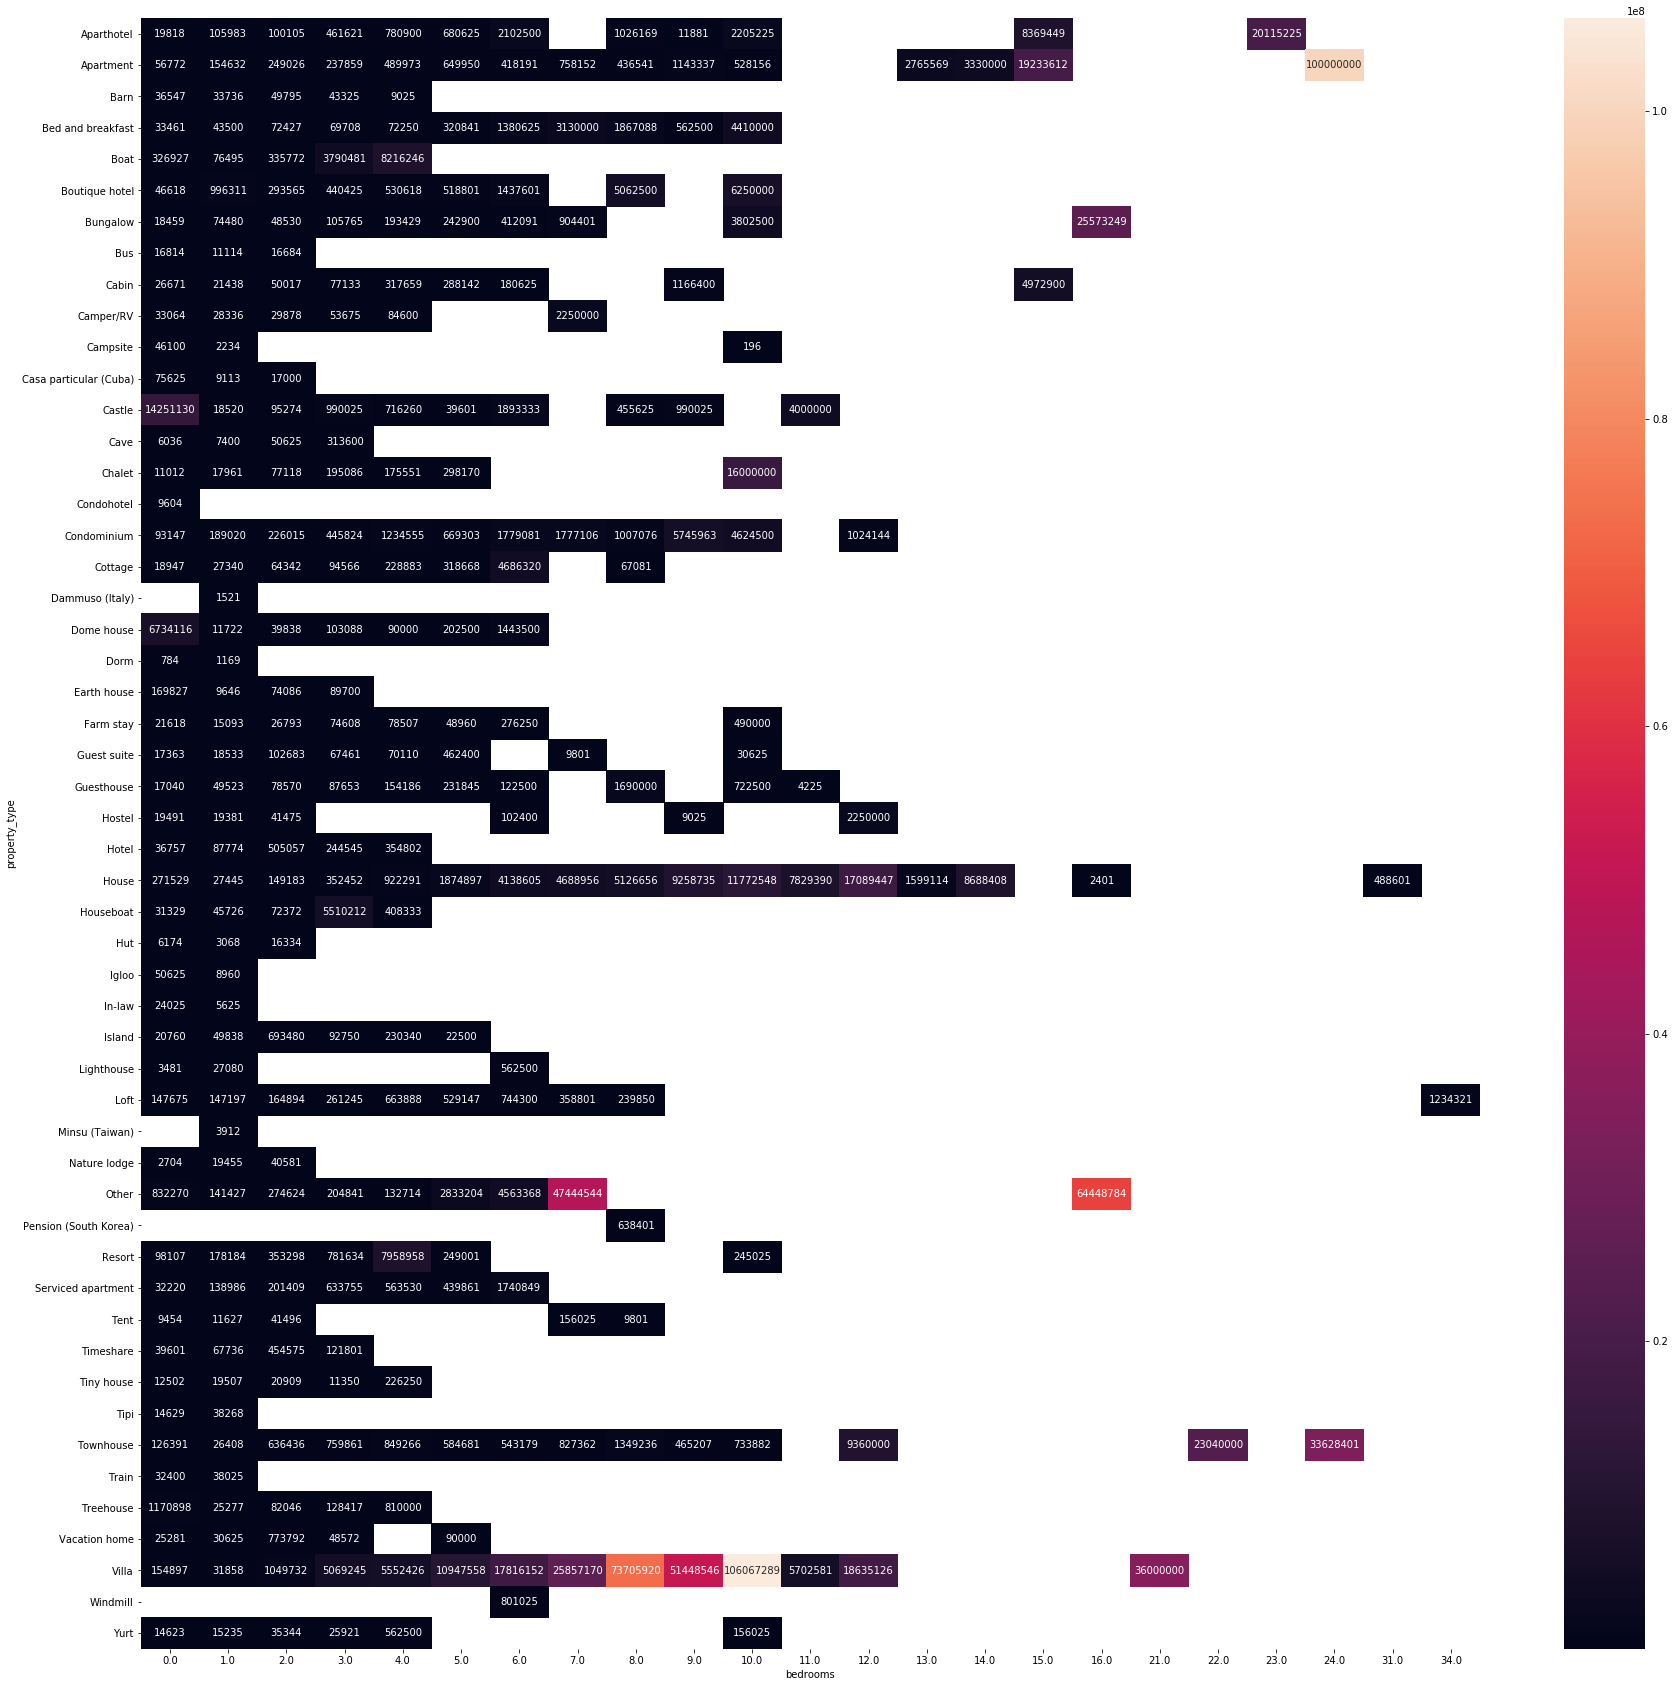

In [15]:
plt.figure(figsize=(30,30))
sns.heatmap(listings.groupby(['property_type', 'bedrooms']).profit.mean().unstack(), annot=True, fmt=".0f")

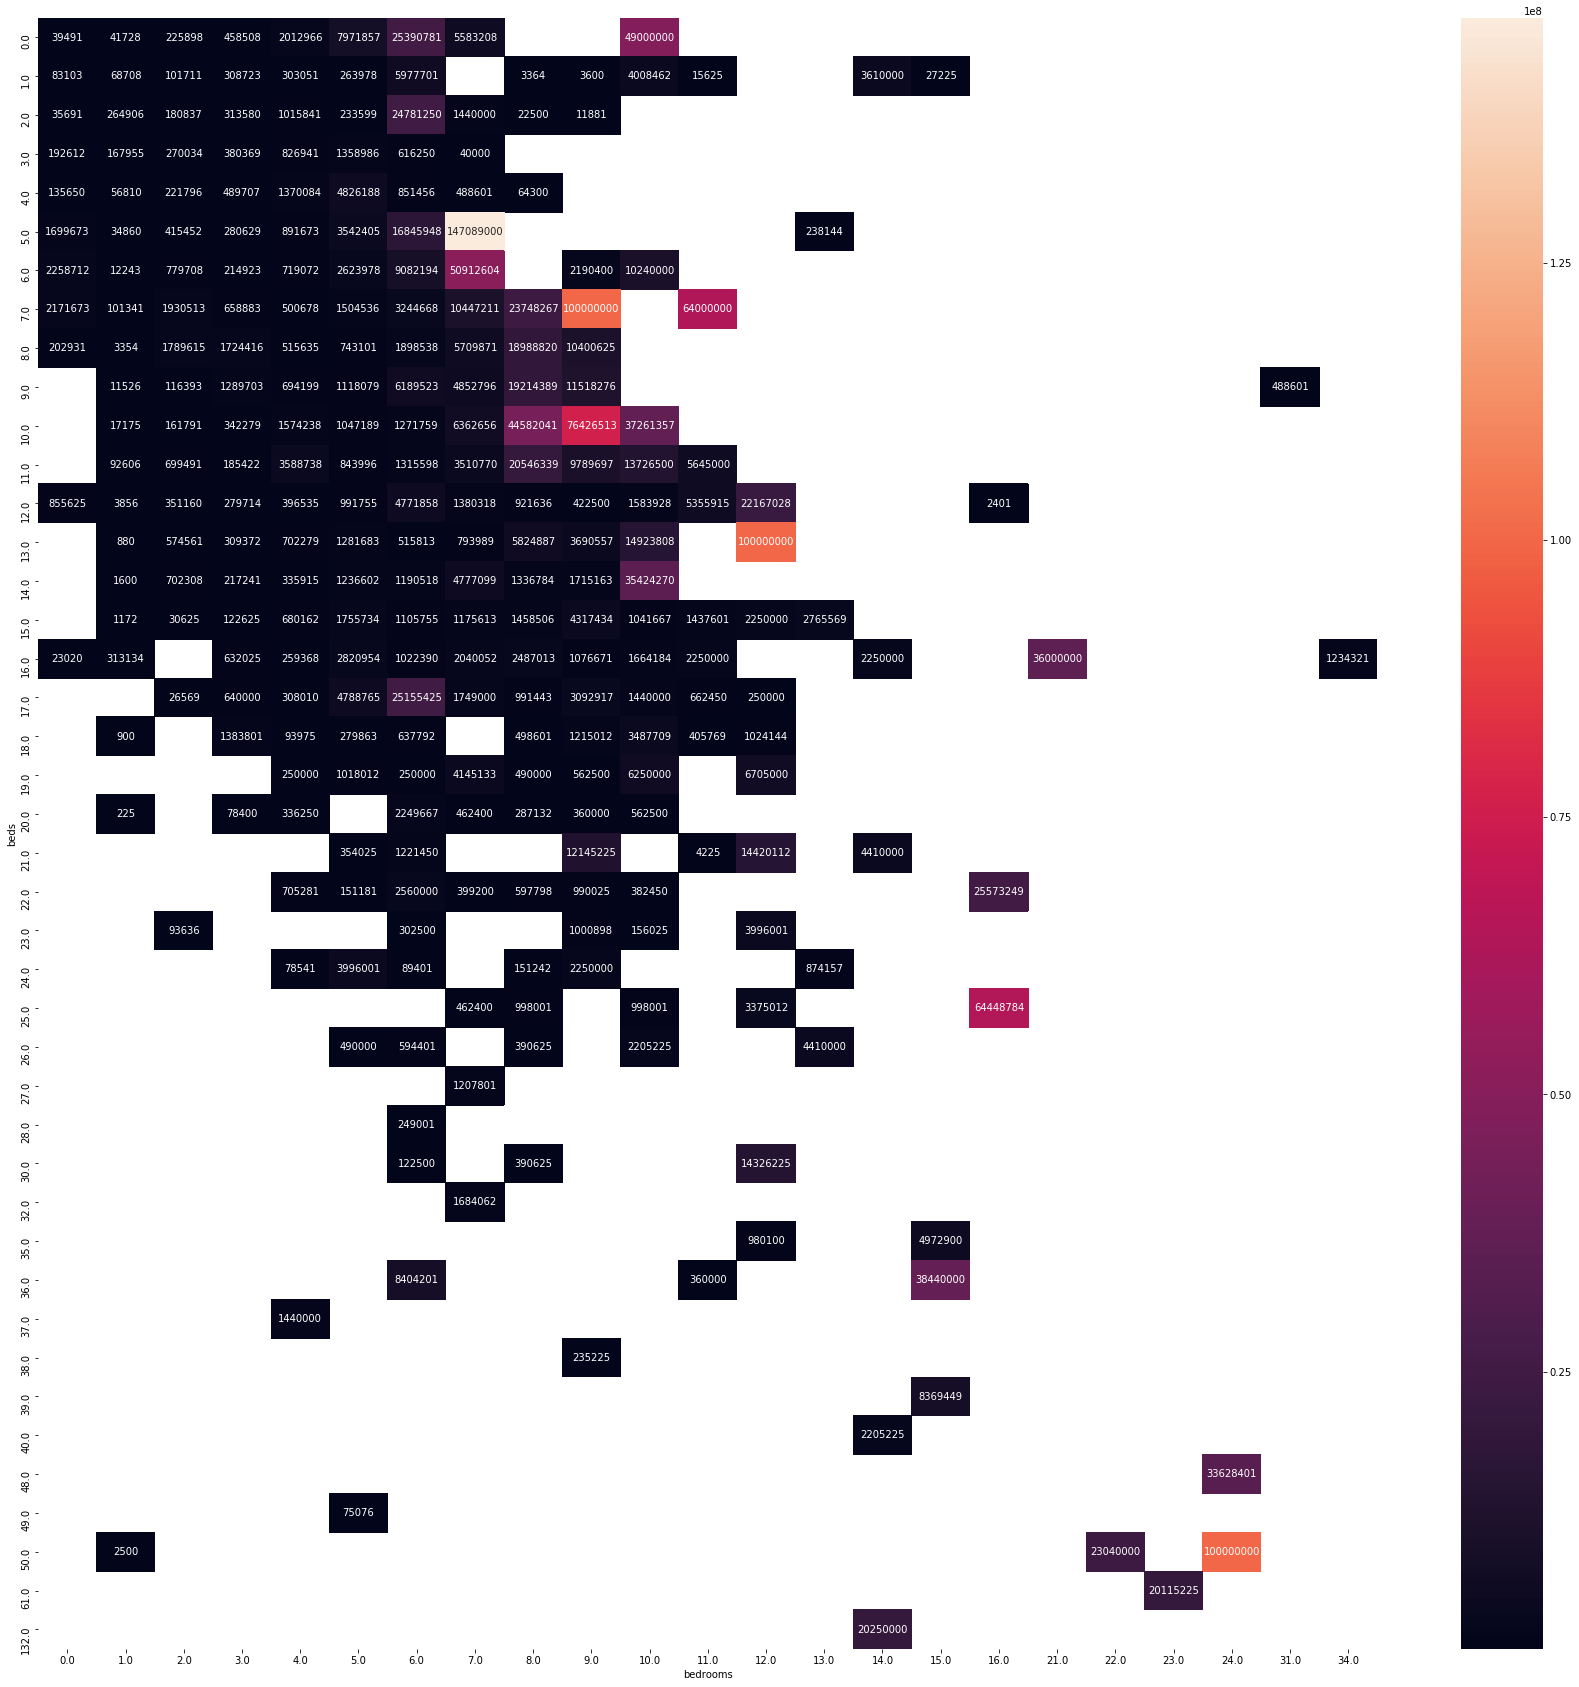

In [17]:
plt.figure(figsize=(30,30))
sns.heatmap(listings.groupby(['beds', 'bedrooms']).profit.mean().unstack(), annot=True, fmt=".0f")

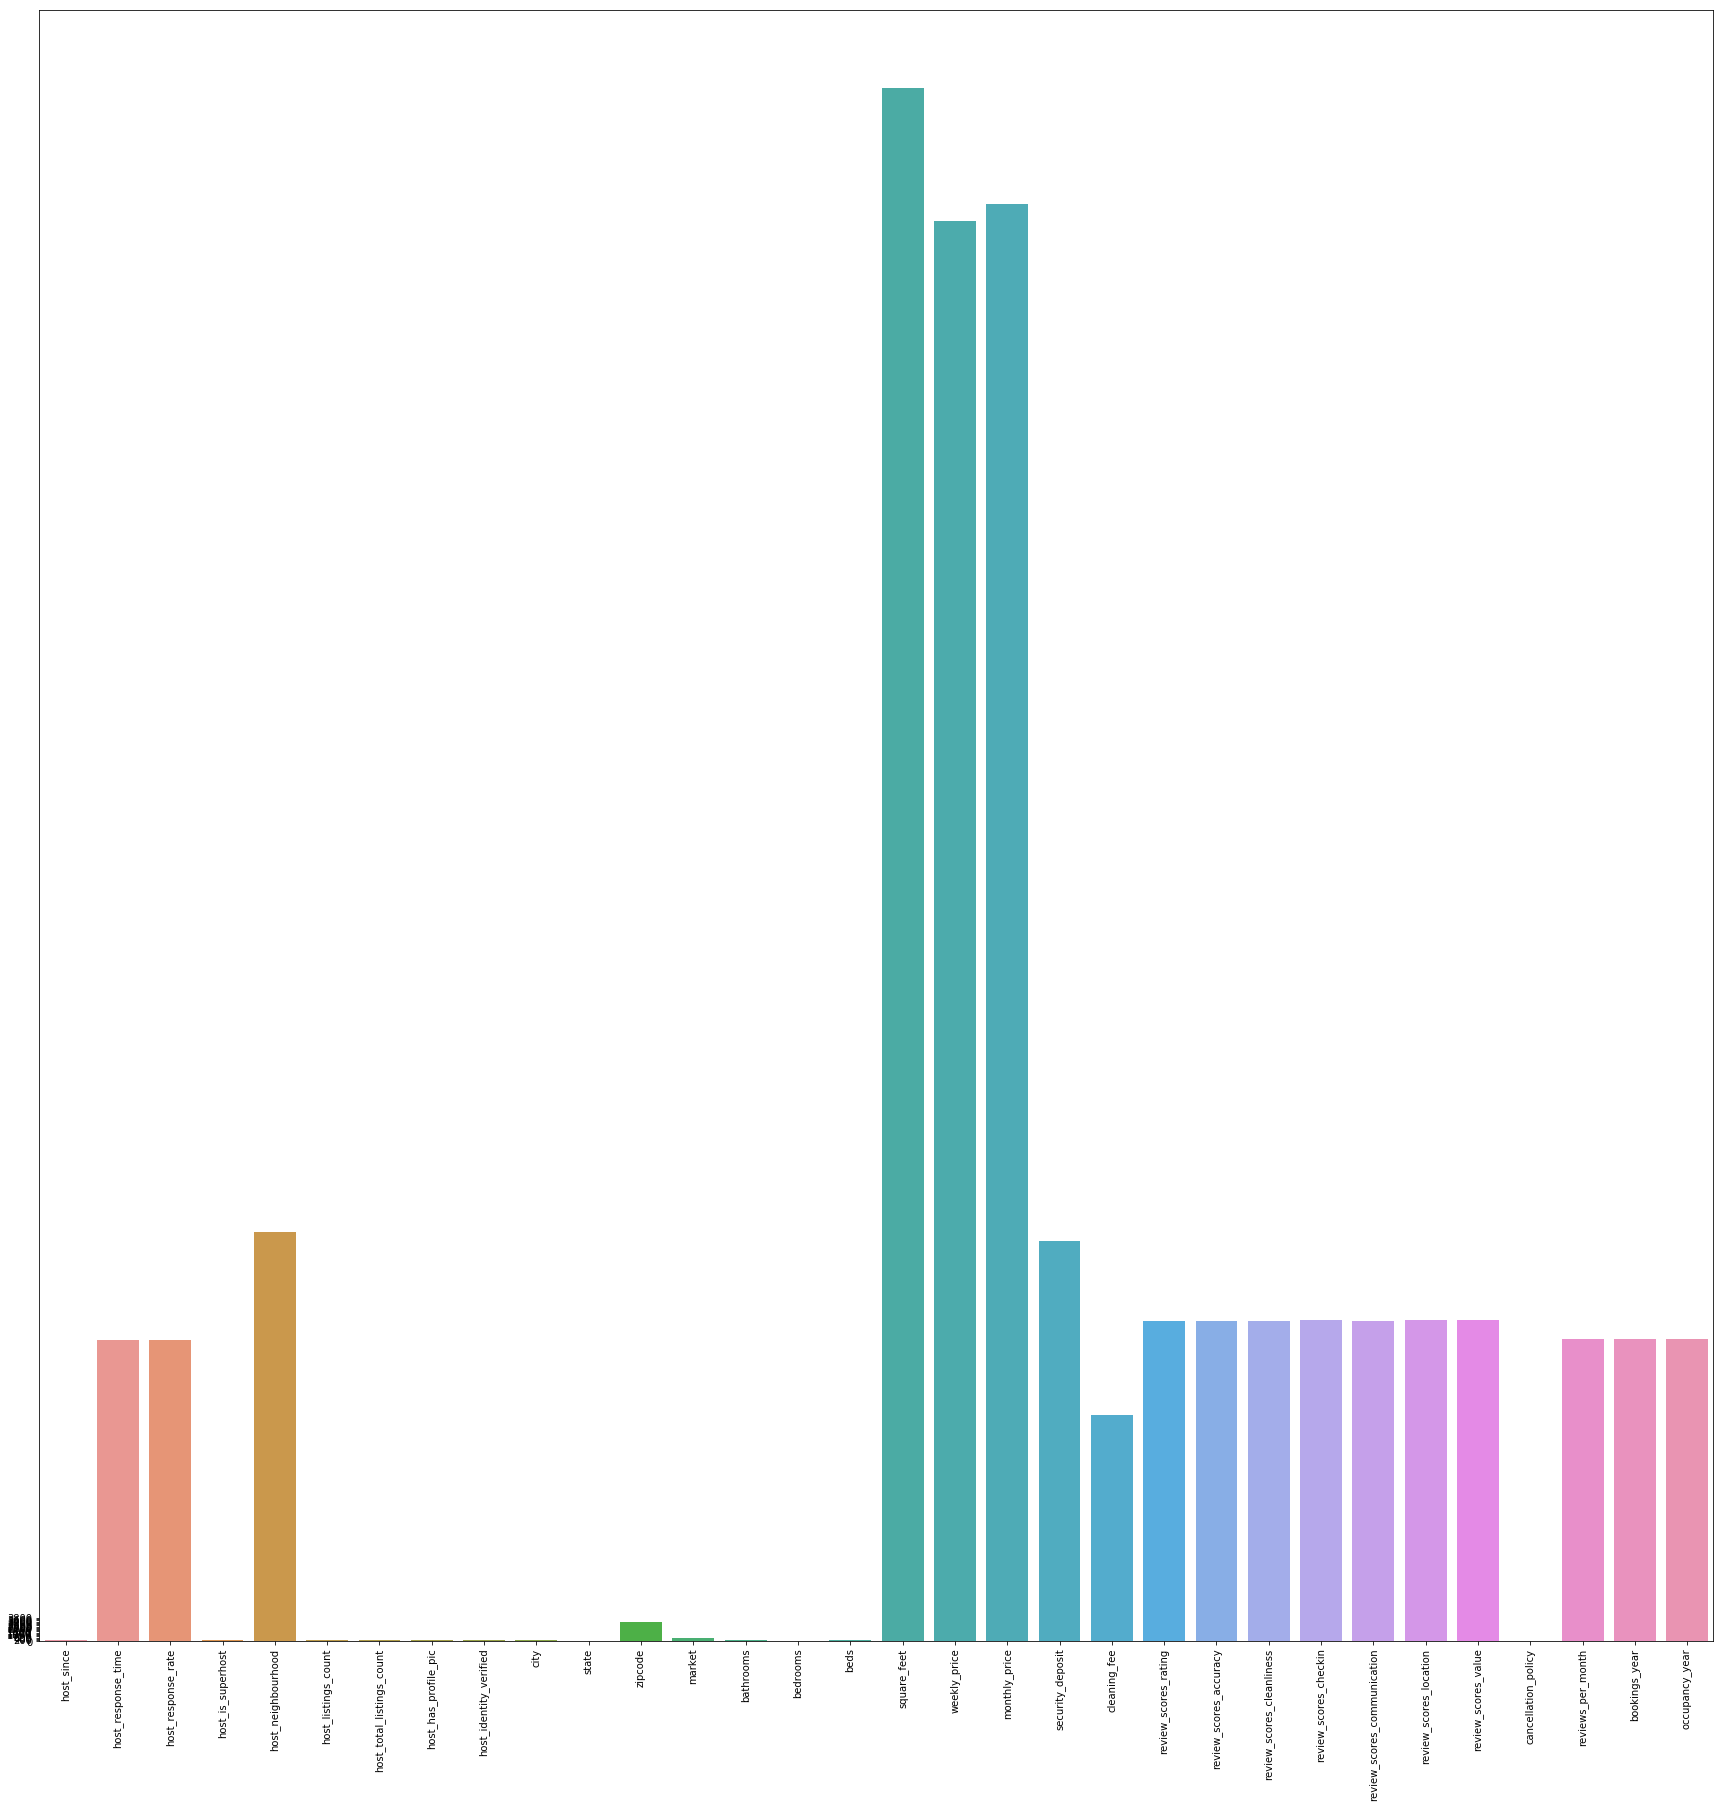

In [21]:
plt.figure(figsize=(30,30))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,4000,200))
sns.barplot(x=listings.isnull().sum()[listings.isnull().sum().nonzero()[0]].index,y=listings.isnull().sum()[listings.isnull().sum().nonzero()[0]].values)

In [141]:
imp = Imputer(missing_values=np.nan, strategy='mean')
imp.fit(x)  
# Imputer(add_indicator=False, copy=True, fill_value=None,strategy='mean', verbose=0)
imp.transform(x) 

array([[8.00000000e+01, 4.00000000e+00, 4.00000000e+00, ...,
        1.56250000e+04, 7.44000000e+00, 2.23200000e+01],
       [1.00000000e+02, 6.00000000e+00, 6.00000000e+00, ...,
        2.10250000e+04, 1.82400000e+01, 5.47200000e+01],
       [1.00000000e+02, 6.00000000e+00, 6.00000000e+00, ...,
        2.85610000e+04, 2.01600000e+01, 6.04800000e+01],
       ...,
       [9.55971503e+01, 0.00000000e+00, 0.00000000e+00, ...,
        2.34090000e+04, 4.56307126e+01, 1.36892138e+02],
       [1.00000000e+02, 3.00000000e+00, 3.00000000e+00, ...,
        4.79610000e+04, 4.56307126e+01, 1.36892138e+02],
       [9.55971503e+01, 0.00000000e+00, 0.00000000e+00, ...,
        2.50000000e+03, 4.56307126e+01, 1.36892138e+02]])

In [142]:
x=x.fillna(0)

In [143]:
x.describe()

,host_response_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,profit,bookings_year,occupancy_year
count,256816.000000,256816.000000,256816.000000,256816.000000,256816.000000,256816.000000,256816.000000,256816.000000,256816.000000,256816.000000,...,256816.000000,256816.000000,256816.000000,256816.000000,256816.000000,256816.000000,256816.000000,2.568160e+05,256816.000000,256816.000000
mean,77.225625,45.884349,45.884349,3.926360,1.410971,1.501974,2.109627,9.411485,218.671041,95.582861,...,7.568863,7.794117,7.790325,7.708024,7.549109,14.451693,1.535277,2.864073e+05,36.846637,110.539911
std,39.589115,200.007747,200.007747,2.702281,0.823756,1.109420,1.756866,196.827788,488.457987,433.936676,...,3.916270,3.996740,3.992513,3.956532,3.903054,41.665993,1.974196,5.142153e+06,47.380713,142.142139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,80.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,75.000000,0.000000,...,8.000000,9.000000,9.000000,9.000000,8.000000,1.000000,0.090000,5.625000e+03,2.160000,6.480000
50%,100.000000,2.000000,2.000000,3.000000,1.000000,1.000000,2.000000,0.000000,125.000000,0.000000,...,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,0.740000,1.562500e+04,17.760000,53.280000
75%,100.000000,7.000000,7.000000,5.000000,2.000000,2.000000,3.000000,0.000000,210.000000,0.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.350000,4.410000e+04,56.400000,169.200000
max,100.000000,1939.000000,1939.000000,80.000000,54.500000,34.000000,132.000000,80000.000000,25000.000000,14000.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,361.000000,66.610000,6.250000e+08,1598.640000,4795.920000


In [145]:
Y=lm.fit(x,y)
lm.coef_
for i in range(len(x.columns)):
    print(x.columns[i],'\t ',np.log(lm.coef_))

host_response_time 	  [  5.25420707   3.52170103   7.78170367          nan          nan
   9.23190533   7.4088541    8.2860914           nan          nan
   5.98600246          nan          nan   7.80063422          nan
          nan   4.28298897          nan  -0.7891769           nan
          nan   6.07340753   2.82729129          nan -13.94786056
   0.17286317          nan   4.67573111   6.09845967          nan
          nan   5.88631571   7.04374388          nan          nan
         -inf          nan   7.25207589   4.0124387    3.43453771
   0.55350841   3.73155684   4.830219  ]
host_response_rate 	  [  5.25420707   3.52170103   7.78170367          nan          nan
   9.23190533   7.4088541    8.2860914           nan          nan
   5.98600246          nan          nan   7.80063422          nan
          nan   4.28298897          nan  -0.7891769           nan
          nan   6.07340753   2.82729129          nan -13.94786056
   0.17286317          nan   4.67573111   6.09845967     

G:\Anaconda\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.038523e-20
  overwrite_a=True).T
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [297]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [371]:
lm.fit(X_train,y_train)
predicts = lm.predict(X_test)

G:\Anaconda\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.050467e-20
  overwrite_a=True).T


In [372]:
print("Root mean squared error is:")
np.sqrt(metrics.mean_squared_error(y_test,predicts))

Root mean squared error is:


55414.926091226065

In [373]:
print('r2 score is:')
r2 = r2_score(y_test,predicts)
r2*100

r2 score is:


28.936326416644775

In [374]:
print("Mean absolute error is:")
mean_absolute_error(y_test,predicts)

Mean absolute error is:


14030.372850455344

In [375]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predicts.flatten()})
error_diff1 = error_diff.head(20)

In [379]:
error_airbnb = pd.DataFrame({
        'Actual Values_lr': np.array(y_test).flatten(),
        'Predicted Values_lr':predicts.flatten()}).head(20)

error_airbnb.head(5)

,Actual Values_lr,Predicted Values_lr
0,3598.56,-36294.463901
1,6996.24,18299.443179
2,0.00,-11002.804717
3,33480.00,44785.642584
4,18316.80,25933.220064


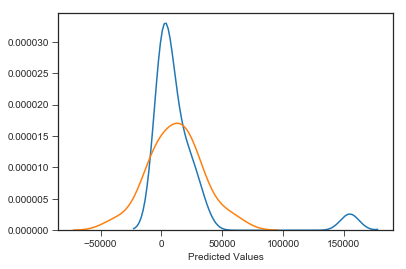

In [377]:
sns.distplot(error_airbnb['Actual Values'],hist=False)
sns.distplot(error_airbnb['Predicted Values'],hist=False)

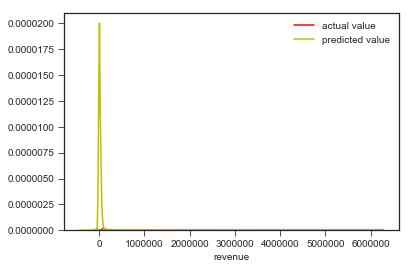

In [158]:
ax1=sns.distplot(y_test,hist=False,color='r',label='actual value')
ax2=sns.distplot(predicts,hist=False,color='y',label='predicted value')

In [351]:

DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,y_train)
y_pred2=DTree.predict(X_test)
r2_score(y_test,y_pred2)

print("""
        Mean Squared Error: {}
        R-squared Score: {}
        Mean Absolute Error: {}
     """,
        np.sqrt(metrics.mean_squared_error(y_test, y_pred2)),
        r2_score(y_test,y_pred2) * 100,
        mean_absolute_error(y_test,y_pred2)
        )


        Mean Squared Error: {}
        R-squared Score: {}
        Mean Absolute Error: {}
      10803.255900652515 97.29913134552149 618.4275568760779


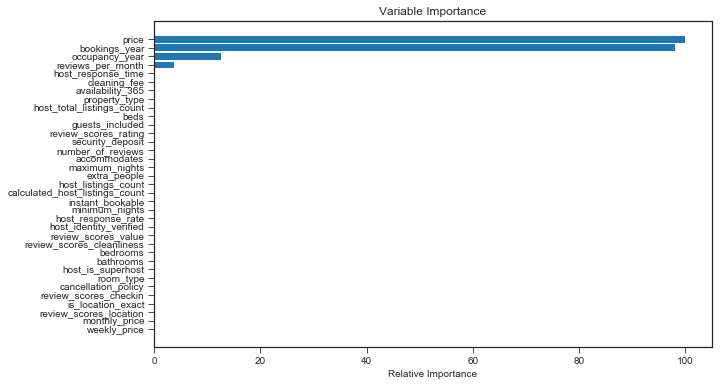

In [352]:
# Plot feature importance
top = 35
feature_importance = DTree.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize = (10,6))
plt.barh(pos[-top:], feature_importance[sorted_idx][-top:], align='center')
plt.yticks(pos[-top:], x.columns[sorted_idx][-top:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [353]:
error_airbnb2 = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_pred2.flatten()}).head(20)

In [361]:
y_pred2

[3643.6069565217394,
 7141.3066666666655,
 0.0,
 33534.1728,
 18819.571764705885,
 115.05599999999995,
 1016.52,
 2076.3085714285717,
 293.0142857142857,
 24298.653913043476,
 19520.1,
 7415.706666666665,
 26783.16,
 1295.04,
 148249.93090909094,
 95.89263157894732,
 10428.424615384616,
 103.63034482758619,
 11273.904000000002,
 1783.7485714285715,
 0.0,
 3486.0,
 0.0,
 16365.500000000004,
 0.0,
 8328.857142857141,
 17446.8643902439,
 40501.27636363637,
 35500.813714285716,
 83249.00571428571,
 29953.703414634147,
 35423.80540540541,
 2638.285714285714,
 0.0,
 48360.096000000005,
 1672.0591304347827,
 0.0,
 0.0,
 33777.0276923077,
 16473.927272727273,
 3658.3542857142857,
 34264.48864864864,
 6361.306666666667,
 6775.200000000001,
 2944.495384615385,
 2506.821818181819,
 169.6235294117648,
 1795.1999999999998,
 0.0,
 0.0,
 18372.19636363636,
 34961.84,
 1731.5576470588235,
 14570.914285714287,
 0.0,
 5873.074285714286,
 6202.655999999998,
 0.0,
 3821.4102857142852,
 16275.699310344826,

In [ ]:
sns.distplot(error_airbnb2['Actual Values'],hist=False,color='r')
sns.distplot(error_airbnb2['Predicted Values'],hist=False,color='b')

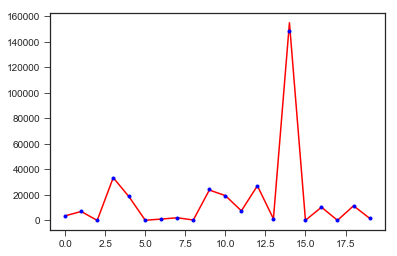

In [384]:
plt.plot(error_airbnb2['Actual Values'],'-',color='r')
plt.plot(error_airbnb2['Predicted Values'],'.',color='b')

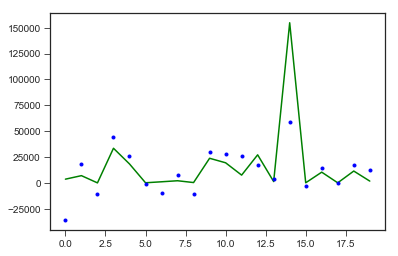

In [385]:
plt.plot(error_airbnb['Actual Values_lr'],'-',color='g')
plt.plot(error_airbnb['Predicted Values_lr'],'.',color='b')

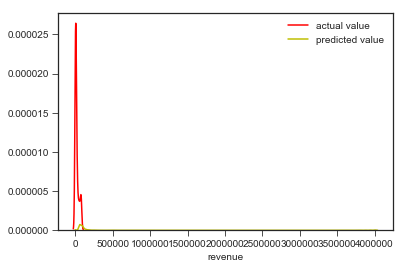

In [282]:
ax1=sns.distplot(y_test.head(20),hist=False,color='r',label='actual value')
ax2=sns.distplot(y_pred2.flatten(),
                 hist=False,color='y',label='predicted value')

## new 2

In [172]:
cat_cols = listings[['host_response_time', 'host_is_superhost', 'room_type', 'bed_type',
                            'instant_bookable', 'cancellation_policy', 'property_type']].columns

abb_Price_predict_expanded = listings.copy()
abb_Price_predict_expanded = pd.get_dummies(listings, sparse=True, columns=cat_cols, drop_first=True)

#Confirm only numeric variables remain
abb_Price_predict_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256816 entries, 0 to 256815
Columns: 110 entries, Unnamed: 0 to property_type_Yurt
dtypes: float64(24), int64(9), object(12), uint8(65)
memory usage: 89.3+ MB


In [ ]:
#Create X and y
X_vars = abb_Price_predict_expanded.columns.difference(['id', 'revenue'])
X = abb_Price_predict_expanded[X_vars]
y = abb_Price_predict_expanded[['revenue']]

In [189]:
X=X.drop(['city','host_has_profile_pic','host_identity_verified','host_neighbourhood','host_since','is_business_travel_ready','is_location_exact','market','require_guest_phone_verification','require_guest_profile_picture','state','zipcode'],axis=1)

In [191]:
X.select_dtypes(include=['object']).dtypes

Series([], dtype: object)

In [216]:
len(X._get_numeric_data().columns)

97

In [249]:
from sklearn.linear_model import LogisticRegression

In [306]:
#Initialize Linear Regression
regression = LinearRegression()
regression.fit(X_train,y_train)
regression.predict(X_test)

array([-36307.3708707 ,  18299.47120511, -11002.87140513, ...,
        11394.82335445,  -4290.78055476,  -2667.24564858])

In [307]:
y_pred2=regression.predict(X_test)
r2_score(y_test,y_pred2)

0.289362947500335

In [308]:
regression.score(X_test,y_test)

0.289362947500335

In [310]:
error_airbnb2 = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_pred2.flatten()}).head(20)

error_airbnb2.head(10)

,Actual Values,Predicted Values
0,3598.56,-36307.370871
1,6996.24,18299.471205
2,0.00,-11002.871405
3,33480.00,44785.689757
4,18316.80,25933.277332
5,115.20,-1525.340092
6,1069.20,-9891.047346
7,2070.00,7994.334276
8,322.56,-10975.046901
9,23803.20,29694.146337


In [311]:
dt = DecisionTreeRegressor(min_samples_leaf=.0001)
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.0001,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [312]:
dt.predict(X_test)

array([ 3643.60695652,  7141.30666667,     0.        , ...,
       38993.69032258,     0.        ,   142.45953488])

In [313]:
y_pred2=dt.predict(X_test)
r2_score(y_test,y_pred2)

0.9729912687721747

In [ ]:
error_airbnb2 = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_pred2.flatten()}).head(20)

error_airbnb2.head(10)

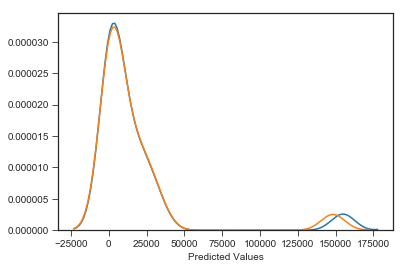

In [317]:
sns.distplot(error_airbnb2['Actual Values'],hist=False)
sns.distplot(error_airbnb2['Predicted Values'],hist=False)

In [315]:
from sklearn.ensemble import RandomForestRegressor

In [386]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [387]:
y_pred2=rf.predict(X_test)
r2_score(y_test,y_pred2)

0.9931589403824578

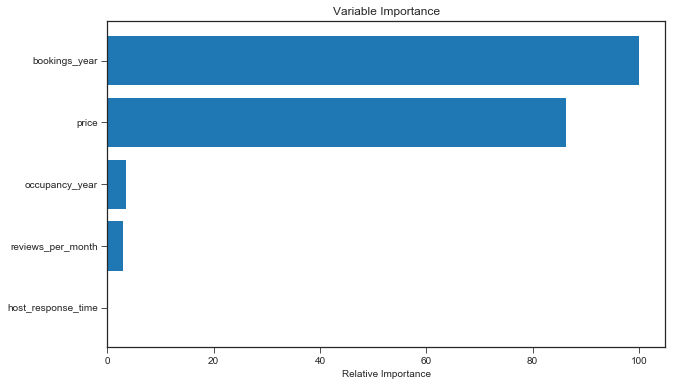

In [254]:
# Plot feature importance
top = 5
feature_importance = dt.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize = (10,6))
plt.barh(pos[-top:], feature_importance[sorted_idx][-top:], align='center')
plt.yticks(pos[-top:], x.columns[sorted_idx][-top:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

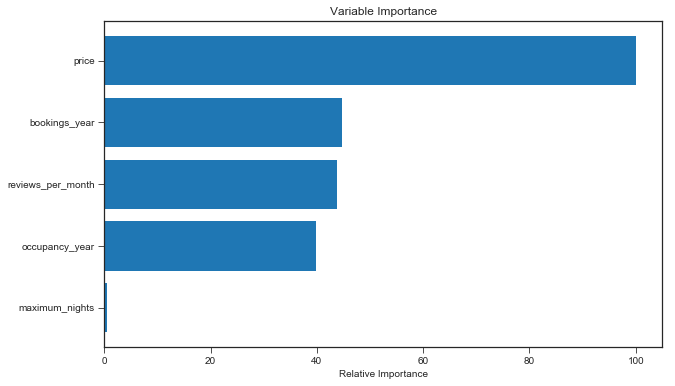

In [255]:
# Plot feature importance
top = 5
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize = (10,6))
plt.barh(pos[-top:], feature_importance[sorted_idx][-top:], align='center')
plt.yticks(pos[-top:], x.columns[sorted_idx][-top:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [388]:
error_airbnb2 = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_pred2.flatten()}).head(20)

error_airbnb2.head(10)

,Actual Values,Predicted Values
0,3598.56,3607.632
1,6996.24,7016.112
2,0.00,0.000
3,33480.00,33444.000
4,18316.80,18168.624
5,115.20,115.200
6,1069.20,1053.216
7,2070.00,2070.000
8,322.56,327.744
9,23803.20,23954.040


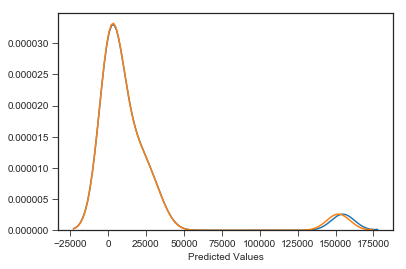

In [389]:
sns.distplot(error_airbnb2['Actual Values'],hist=False)
sns.distplot(error_airbnb2['Predicted Values'],hist=False)

In [394]:
error_airbnb2.describe()

,Actual Values,Predicted Values
count,20.000000,20.000000
mean,16185.636000,16023.175200
std,34220.451509,33586.608995
min,0.000000,0.000000
25%,882.540000,871.848000
50%,5297.400000,5311.872000
75%,18597.600000,18470.718000
max,154872.000000,151900.128000


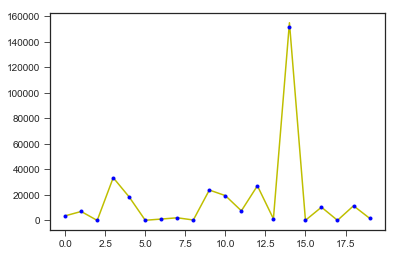

In [392]:
plt.plot(error_airbnb2['Actual Values'],'-',color='y')
plt.plot(error_airbnb2['Predicted Values'],'.',color='b')

In [164]:
pipeline_ols.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('Scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('Regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [166]:
#Calculate R^2 on train and test sets
ols_r2_train = pipeline_ols.score(X_train, y_train)
ols_r2_test = pipeline_ols.score(X_test, y_test)

In [167]:
from sklearn.metrics import mean_squared_error

In [169]:
#Calculate Mean Squared Error on test and train sets
x_train_pred = pipeline_ols.predict(X_train)
x_test_pred = pipeline_ols.predict(X_test)

mse_train = mean_squared_error(y_train, x_train_pred)
mse_test = mean_squared_error(y_test, x_test_pred)

In [170]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [171]:
scores_df = pd.DataFrame([{'Model':'OLS_RawPrice', 'R2_train':ols_r2_train, 'R2_test':ols_r2_test, 
                          'RMSE_train':rmse_train, 'RMSE_test':rmse_test}])

In [172]:
scores_df[['Model', 'R2_train', 'R2_test', 'RMSE_train', 'RMSE_test']]

,Model,R2_train,R2_test,RMSE_train,RMSE_test
0,OLS_RawPrice,0.293918,0.301192,55591.899774,65626.093555


In [173]:
coefficients = pd.DataFrame({"Feature":X_train.columns, 
                             "Coefficients_RawPrice":np.transpose(pipeline_ols.named_steps['Regression'].coef_)})

coefficients[coefficients['Coefficients_RawPrice']!=0].count()

Feature                  43
Coefficients_RawPrice    43
dtype: int64

In [174]:
coefficients

,Feature,Coefficients_RawPrice
0,host_response_time,1.110493e+03
1,host_response_rate,2.898682e+03
2,host_is_superhost,4.266527e+03
3,host_listings_count,9.138752e+16
4,host_total_listings_count,-9.138752e+16
5,host_has_profile_pic,1.892094e+04
6,host_identity_verified,2.771835e+03
7,is_location_exact,3.773212e+03
8,property_type,-5.949698e+03
9,room_type,-5.611141e+02


In [176]:
pipeline_ols.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('Scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('Regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [177]:
sorted(coefficients['Coefficients_RawPrice'])

[-9.138751924821974e+16,
 -454349317035187.3,
 -115070493469423.05,
 -711224325352.0,
 -1969341.729670898,
 -232285.97581867696,
 -59128.80198604701,
 -53400.90686515743,
 -41826.977541216715,
 -41676.217002114114,
 -19987.736881087134,
 -13565.581686273363,
 -5949.697870318614,
 -4966.5352513048265,
 -3352.6092091055298,
 -2316.2273499047305,
 -1529.6179780781113,
 -561.1140607758862,
 -79.29385013212884,
 -33.22502601368864,
 37.720816690299614,
 321.6346985335542,
 1110.493252493539,
 1830.814801772623,
 2598.448746614876,
 2771.835198761445,
 2898.6817515330176,
 3510.6331481368206,
 3752.9114714112757,
 3773.2118313212686,
 4266.526736573111,
 8562.974722563722,
 10085.137406747766,
 11974.853038355368,
 12013.619008185384,
 17395.12788188165,
 18920.944964617,
 25140.090337973154,
 27386.63975566282,
 330073.9957197572,
 1714735.7868531346,
 569419811159055.6,
 9.138751924820557e+16]

In [178]:
sorted(coefficients['Coefficients_RawPrice'],reverse=True)

[9.138751924820557e+16,
 569419811159055.6,
 1714735.7868531346,
 330073.9957197572,
 27386.63975566282,
 25140.090337973154,
 18920.944964617,
 17395.12788188165,
 12013.619008185384,
 11974.853038355368,
 10085.137406747766,
 8562.974722563722,
 4266.526736573111,
 3773.2118313212686,
 3752.9114714112757,
 3510.6331481368206,
 2898.6817515330176,
 2771.835198761445,
 2598.448746614876,
 1830.814801772623,
 1110.493252493539,
 321.6346985335542,
 37.720816690299614,
 -33.22502601368864,
 -79.29385013212884,
 -561.1140607758862,
 -1529.6179780781113,
 -2316.2273499047305,
 -3352.6092091055298,
 -4966.5352513048265,
 -5949.697870318614,
 -13565.581686273363,
 -19987.736881087134,
 -41676.217002114114,
 -41826.977541216715,
 -53400.90686515743,
 -59128.80198604701,
 -232285.97581867696,
 -1969341.729670898,
 -711224325352.0,
 -115070493469423.05,
 -454349317035187.3,
 -9.138751924821974e+16]

In [322]:
#Calculate correlation for beds and price
beds_coef, beds_p_value = stats.pearsonr(listings.revenue, listings.beds)
print("Price/Beds Pearson Correlation Coefficient: ", beds_coef, "and a P-value of:", beds_p_value)

#Calculate correlation for bedrooms and price
brooms_coef, brooms_p_value = stats.pearsonr(listings.revenue, listings.bedrooms)
print("Price/Bedrooms Pearson Correlation Coefficient: ", brooms_coef, "and a P-value of:", brooms_p_value)

#Calculate correlation for bathrooms and price
bath_coef, bath_p_value = stats.pearsonr(listings.revenue, listings.bathrooms)
print("Price/Bathrooms Pearson Correlation Coefficient: ", bath_coef, "and a P-value of:", np.log(bath_p_value))


#Calculate correlation for accomodates and price
acc_coef, acc_p_value = stats.pearsonr(listings.revenue, listings.accommodates)
print("Price/Accommodates Pearson Correlation Coefficient: ", acc_coef, "and a P-value of:", acc_p_value)

Price/Beds Pearson Correlation Coefficient:  0.11907880367569179 and a P-value of: 0.0
Price/Bedrooms Pearson Correlation Coefficient:  0.09186269399032827 and a P-value of: 0.0
Price/Bathrooms Pearson Correlation Coefficient:  0.05869265063834914 and a P-value of: -446.7231063952287
Price/Accommodates Pearson Correlation Coefficient:  0.13767216663506002 and a P-value of: 0.0


In [323]:
#Convert property types smaller than Other, lumping them in with Other

#Calculate value counts for each type
prop_types = pd.value_counts(listings.property_type)
#Create a boolean mask, False if proportion less than .36 
#...(captures everything under "Other")
mask = (prop_types/prop_types.sum() * 100).lt(.36)

#Change the property types in abb dataframe
listings['property_type'] = np.where(listings['property_type'].isin(prop_types[mask].index),
                               'Other', listings['property_type'])

In [324]:
property_stats = pd.DataFrame()
for index, value in listings.property_type.value_counts().iteritems():
    df = pd.DataFrame()
    statistic, pvalue = stats.ttest_ind(listings[listings['property_type'] == index]['revenue'], 
                                            listings[listings['property_type'] != index]['revenue'])
    pvalue = "{:.8f}".format(float(pvalue))
    mean_True = listings[listings['property_type'] == index]['price'].mean()
    mean_False = listings[listings['property_type'] != index]['price'].mean()
    count_has = listings[listings['property_type'] == index]['property_type'].count()

    data = pd.DataFrame({'prop_type' : [index], 'stat' : [statistic], 'pvalue' : [pvalue],
                        'mean_True' : [mean_True], 'mean_False' : [mean_False],
                        'count_has' : [count_has], 'mean_diff' : [mean_True - mean_False]})

    property_stats = property_stats.append(data, ignore_index=True)

In [326]:
property_stats.sort_values(by=['pvalue'], ascending=False)

,prop_type,stat,pvalue,mean_True,mean_False,count_has,mean_diff
8,Serviced apartment,0.498075,0.61843153,268.934677,217.932267,3720,51.002411
9,Bungalow,0.545230,0.58559576,155.764918,219.566140,3603,-63.801222
14,Boutique hotel,-0.588468,0.55621889,302.606222,218.238057,1318,84.368165
15,Hotel,-1.642257,0.10053803,267.104505,218.460795,1110,48.643710
1,House,2.715471,0.00661861,259.679143,202.254339,73419,57.424804
10,Villa,3.139762,0.00169104,1185.601459,209.814272,2331,975.787187
11,Cottage,3.865773,0.00011077,184.868267,218.897357,1708,-34.029090
7,Loft,4.086662,0.00004378,211.392019,218.793820,4260,-7.401801
6,Other,-4.363324,0.00001282,180.925015,219.396226,4841,-38.471210
12,Bed and breakfast,-4.815003,0.00000147,154.611724,219.034778,1450,-64.423053


In [183]:
notNA_stats_Price = pd.DataFrame()

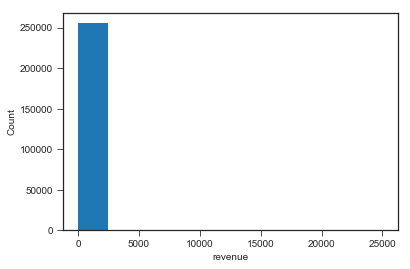

In [336]:
# Statistical Tests
# Test 1 - Normality of Price/Log Price
# My primary goal with this project is to predict the Price of AirBnB listings, so first I will example that outcome variable.

# First I will use the Kolmogorov-Smirnov test to check if the distribution of Price is normal. I suspect I will find that price is not normally distributed, because visualizing it shows a peak at the left or lower-priced end of the range, with a long tail to the right or high-priced end.

# The null hypothesis for this test is that Price follows a normal distribution. The alternate hypothesis is that it has any other distribution.


#As a reminder, here is what the plot of price distribution looks like.
plt.hist(listings.price, bins=10)
plt.xlabel('revenue')
plt.ylabel('Count')
plt.show()

In [337]:
#generate summary statistics
price_mean = np.mean(listings.price)
price_std = np.std(listings.price)

test_stat = stats.kstest(listings['price'], 'norm', args=(price_mean, price_std))
test_stat

KstestResult(statistic=0.3386408450526953, pvalue=0.0)

In [ ]:
# The p-value returned is extremely small, 2.81e-309, therefore we can reject the null hypothesis that Price follows a normal distribution. Next I will check log of price to see if it is normal. If so it would be more useful for statistical inference and modeling.

listings['logprice'] = np.log(listings.price)

# How do different response time groupings relate to price, for hosts that respond 100% of the time?

In [327]:
#create subset of AirBnB dataset with just hosts that respond 100% of the time
abb_100_response = listings[listings['host_response_rate'] == 100]
abb_100_response.host_response_time.value_counts()

hrt_1 = abb_100_response[abb_100_response['host_response_time']=='within an hour']['revenue']
hrt_2 = abb_100_response[abb_100_response['host_response_time']=='within a few hours']['revenue']
hrt_3 = abb_100_response[abb_100_response['host_response_time']=='within a day']['revenue']

print("Mean price for hosts responding within an hour: ", np.mean(hrt_1))
print("Mean price for hosts responding within a few hours: ", np.mean(hrt_2))
print("Mean price for hosts responding within a day: ", np.mean(hrt_3))

stats.f_oneway(hrt_1, hrt_2, hrt_3)

Mean price for hosts responding within an hour:  24176.782601899795
Mean price for hosts responding within a few hours:  11234.30242906786
Mean price for hosts responding within a day:  7479.530135366019


F_onewayResult(statistic=795.0692976220287, pvalue=0.0)

In [328]:
for col in listings.columns:
    if 'NaN' in col:
        statistic, pvalue = stats.ttest_ind(listings[listings[col] == True]['revenue'], 
                                            listings[listings[col] == False]['revenue'])
        pvalue = "{:.8f}".format(float(pvalue))
        mean_True = listings[listings[col] == True]['revenue'].mean()
        mean_False = listings[listings[col] == False]['revenue'].mean()
        count_NA = len(listings.index) - listings[col].sum()
        
        data = pd.DataFrame({'variable' : [col], 'stat' : [statistic], 'pvalue' : [pvalue],
                            'mean_True' : [mean_True], 'mean_False' : [mean_False],
                            'count_NA' : [count_NA], 'mean_diff' : [mean_False - mean_True]})
        
        notNA_stats_Price = notNA_stats_Price.append(data, ignore_index=True)

In [329]:
notNA_stats_Price

""


In [331]:
dfl_nonsuper=listings.loc[(listings.host_is_superhost == 'f'),:]
dfl_super=listings.loc[(listings.host_is_superhost == 't'),:]
dfl_super_count=dfl_super.groupby(by=['...1'])['Unnamed: 0'].count()
dfl_nonsuper_count=dfl_nonsuper.groupby(by=['...1'])['Unnamed: 0'].count()
print(dfl_super_count.mean(),dfl_super_count.std())
print(dfl_nonsuper_count.mean(),dfl_nonsuper_count.std())

3.1150070634259426 3.2823485411712348
3.6247982672216086 3.8239194713908535


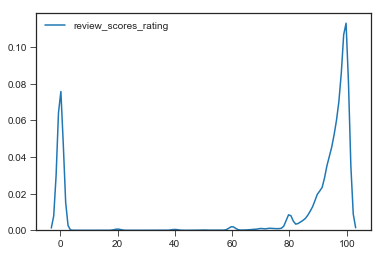

In [332]:
sns.kdeplot(listings['review_scores_rating'])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import ensemble

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Imputer
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

In [ ]:
corr = listings.corr()
corr.style.background_gradient(cmap='coolwarm')

In [347]:
x=x.fillna(0)
imp = Imputer(missing_values=np.nan, strategy='mean')
imp.fit(x)  
# Imputer(add_indicator=False, copy=True, fill_value=None,strategy='mean', verbose=0)
imp.transform(x) 


from sklearn import preprocessing
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
df['require_guest_profile_picture']=le.fit_transform(df['require_guest_profile_picture'].astype(str)) 
# le.fit(df['host_response_time'])
df['host_response_time']=le.fit_transform(df['host_response_time'].astype(str)) 
# le.fit(df['is_location_exact'])
df['is_location_exact']=le.fit_transform(df['is_location_exact'].astype(str)) 
# le.fit(df['property_type'])
df['property_type']=le.fit_transform(df['property_type'].astype(str)) 
# le.fit(df['room_type'])
df['room_type']=le.fit_transform(df['room_type'].astype(str)) 
# le.fit(df['bed_type'])
df['bed_type']=le.fit_transform(df['bed_type'].astype(str)) 
# le.fit(df['is_business_travel_ready'])
df['is_business_travel_ready']=le.fit_transform(df['is_business_travel_ready'].astype(str)) 
# le.fit(df['require_guest_phone_verification'])
df['require_guest_phone_verification']=le.fit_transform(df['require_guest_phone_verification'].astype(str)) 


x=df.drop(['Unnamed: 0', 'X', '...1','host_since','host_neighbourhood','city','state','zipcode', 'market','revenue'],axis=1)
y=df['revenue']

X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y, test_size=0.2, random_state=20)

#Initialize Linear Regression
regression = LinearRegression()
regression.fit(X_train,y_train)
y_pred2=regression.predict(X_test)
r2_score(y_test,y_pred2)

print('r2 score is:')
r2 = r2_score(y_test,predicts)
r2*100

dt = DecisionTreeRegressor(min_samples_leaf=.0001)
dt.fit(X_train,y_train)
y_pred2=dt.predict(X_test)
r2_score(y_test,y_pred2)


print('r2 score is:')
r2 = r2_score(y_test,predicts)
r2*100

rf=RandomForestRegressor()
rf.fit(X_train,y_train.values)
y_pred2=rf.predict(X_test)
r2_score(y_test,y_pred2)


print('r2 score is:')
r2 = r2_score(y_test,predicts)
r2*100

# Plot feature importance
top = 5
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize = (10,6))
plt.barh(pos[-top:], feature_importance[sorted_idx][-top:], align='center')
plt.yticks(pos[-top:], x.columns[sorted_idx][-top:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

error_airbnb2 = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_pred2.flatten()}).head(20)

error_airbnb2.head(10)

sns.distplot(error_airbnb['Actual Values'],hist=False)
sns.distplot(error_airbnb['Predicted Values'],hist=False)

r2 score is:
r2 score is:


KeyboardInterrupt: 